In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import plot_tree

In [2]:
data=pd.read_csv(r'C:\Users\patil\ML_LAB\Assi7\Admission_Predict_Ver1.1.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.shape

(500, 9)

In [7]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.fillna(0, inplace=True)
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

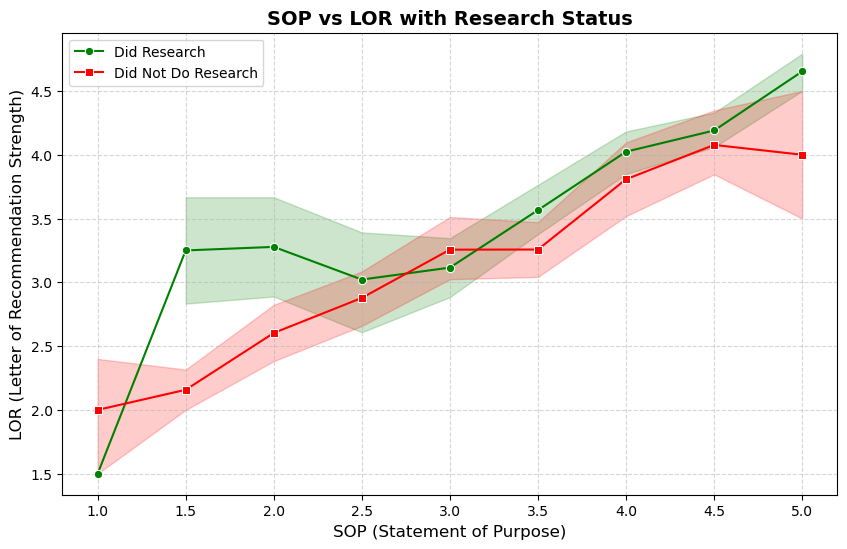

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data[data['Research'] == 1]['SOP'], 
             y=data[data['Research'] == 1]['LOR '], 
             marker='o', linestyle='-', color='green', label='Did Research')
sns.lineplot(x=data[data['Research'] == 0]['SOP'], 
             y=data[data['Research'] == 0]['LOR '], 
             marker='s', linestyle='-', color='red', label='Did Not Do Research')
plt.xlabel("SOP (Statement of Purpose)", fontsize=12)
plt.ylabel("LOR (Letter of Recommendation Strength)", fontsize=12)
plt.title("SOP vs LOR with Research Status", fontsize=14, fontweight='bold')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


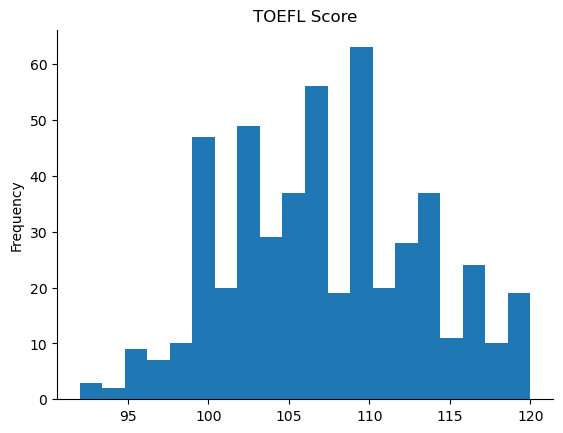

In [10]:
from matplotlib import pyplot as plt
data['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

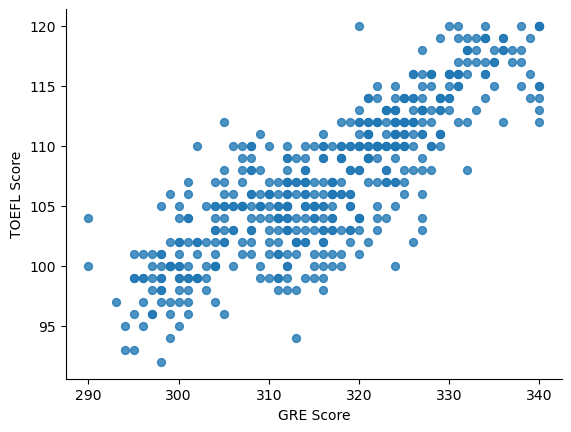

In [11]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Comparison betweeen GRE Score and TOEFL Score by University Rating')

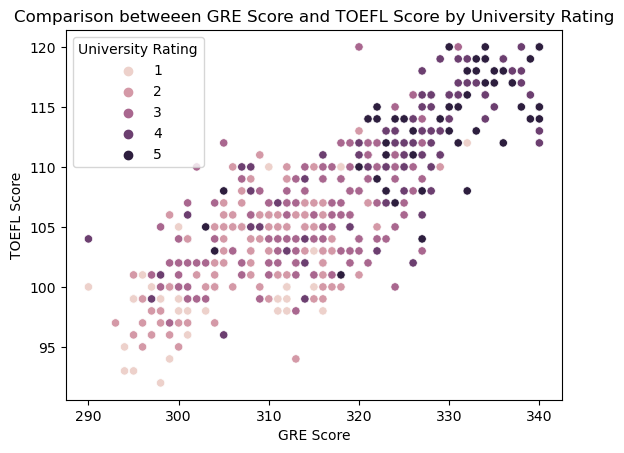

In [12]:
sns.scatterplot(x=data['GRE Score'], y=data['TOEFL Score'], hue=data['University Rating'])
plt.title("Comparison betweeen GRE Score and TOEFL Score by University Rating")

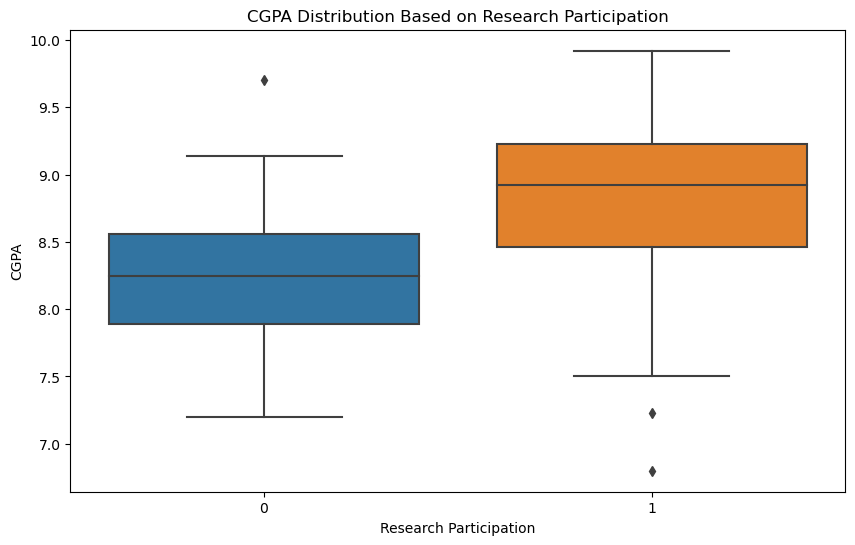

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Research'], y=data['CGPA'])
plt.title('CGPA Distribution Based on Research Participation')
plt.xlabel('Research Participation')
plt.ylabel('CGPA')
plt.show()
plt.figure(figsize=(10, 6))

In [14]:
label_encoder = LabelEncoder()
data['Research'] = label_encoder.fit_transform(data['Research'])

In [15]:
data["Admitted"] = (data["Chance of Admit "] >= 0.50).astype(int)
y = data["Admitted"]

In [16]:
x = data[['GRE Score','CGPA']]
y = data['Admitted']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test = np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


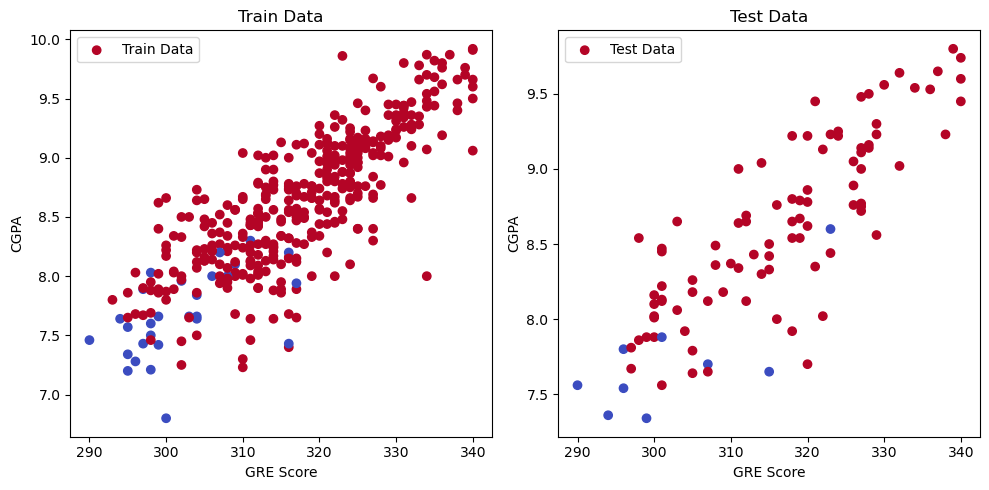

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train['GRE Score'], x_train['CGPA'], c=y_train, cmap='coolwarm', marker='o', label='Train Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Train Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test['GRE Score'], x_test['CGPA'], c=y_test, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Test Data')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
model= DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
print(y_pred.shape)

(100,)


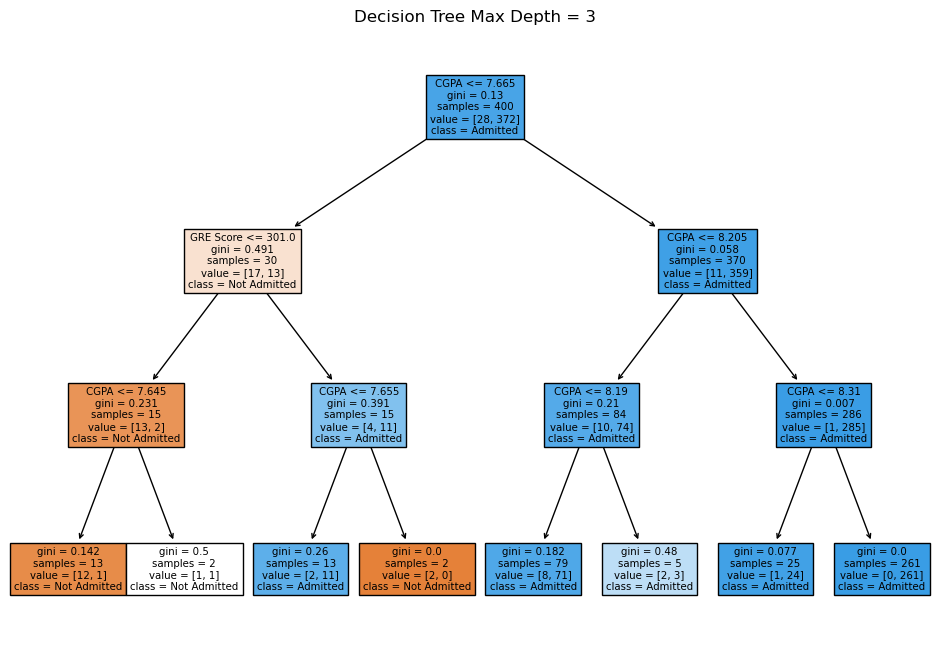

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=list(x.columns), class_names=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Max Depth = 3")
plt.show()

In [21]:
print("Model Evaluation:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Model Evaluation:
Accuracy: 0.94
Precision: 0.9473684210526315
Recall: 0.989010989010989
F1 Score: 0.967741935483871
